**TIME SERIES**

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data=yf.download('AAPL',start='2024-01-01')
stock_data.head(10)


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
2024-01-09,183.794067,183.803989,181.401584,182.582935,42841800
2024-01-10,184.836426,185.044891,182.582924,183.009806,46792900
2024-01-11,184.240768,185.690161,182.285089,185.183859,49128400


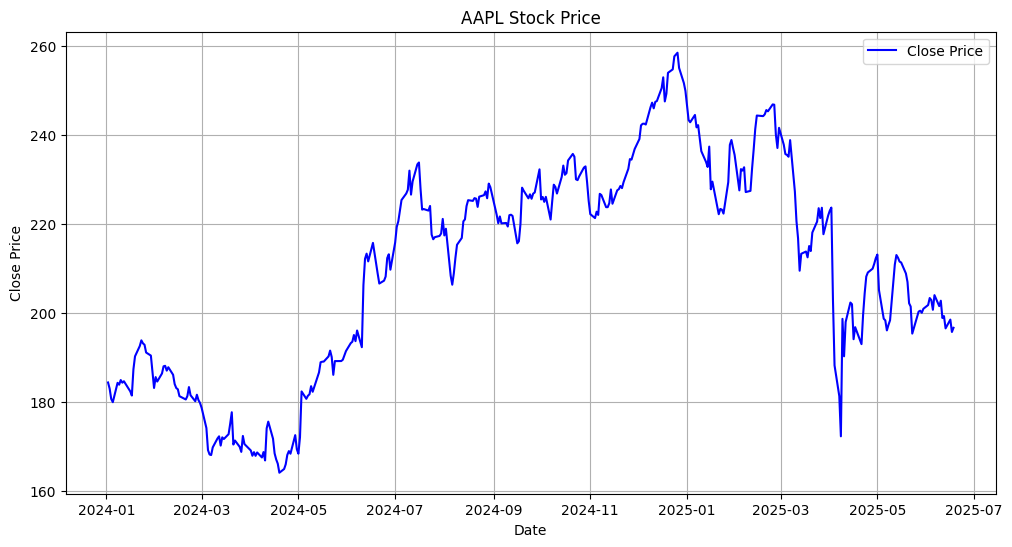

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index,stock_data['Close'],label='Close Price',color='blue')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

CLASSICAL TIME SERIES DECOMPOSITION

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [ ]:
additive_trend=decomposition.trend
additive_seasonal=decomposition.seasonal
additive_residual=decomposition.resid

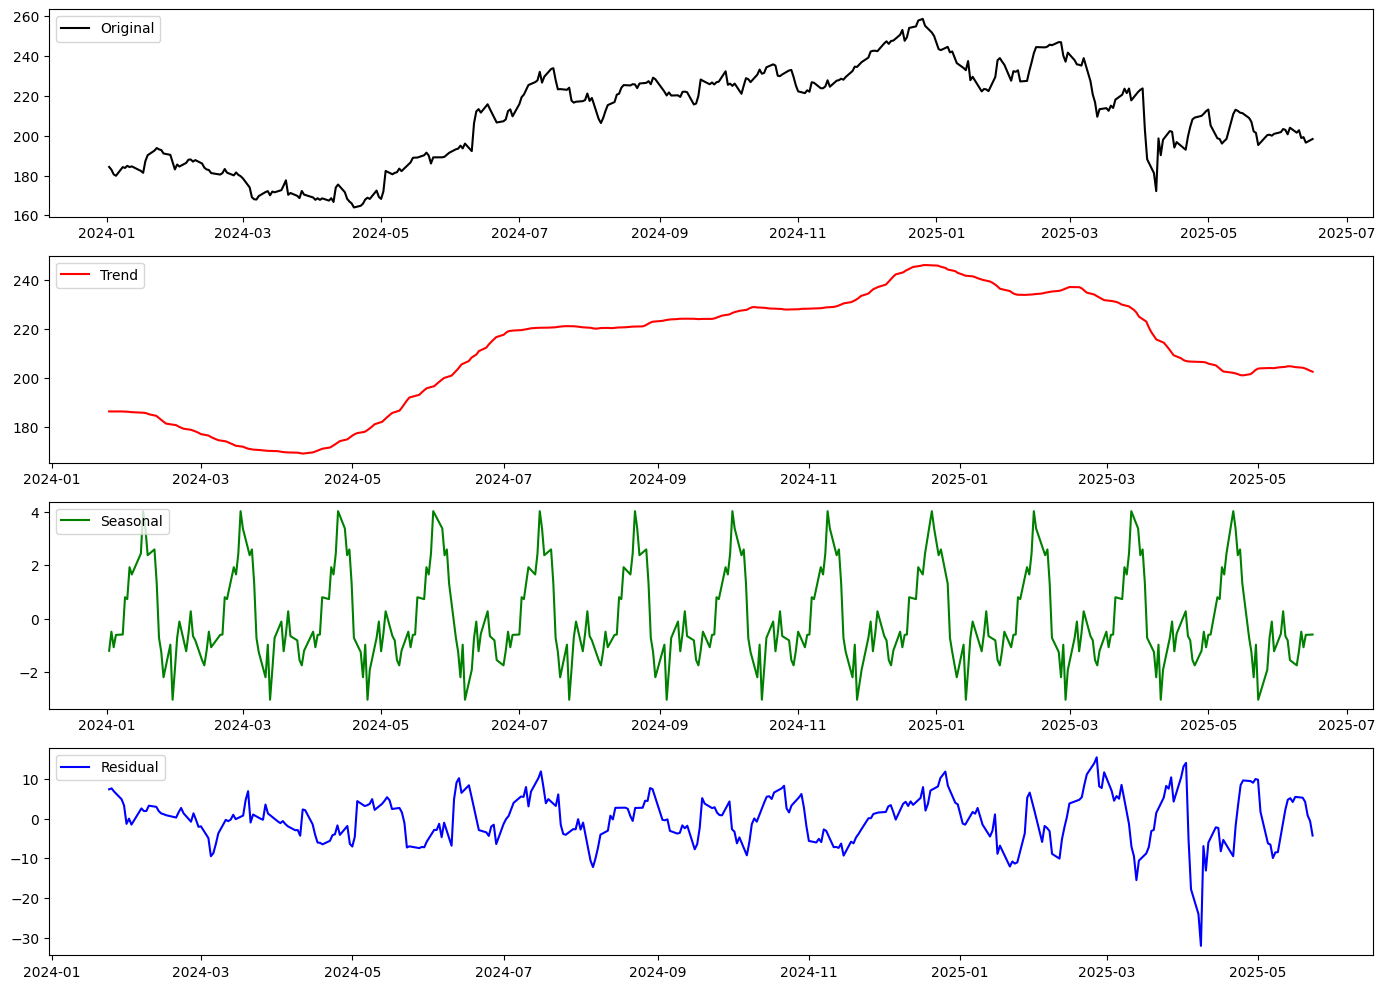

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'],label='Original',color='black')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(additive_trend,label='Trend',color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(additive_seasonal,label='Seasonal',color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(additive_residual,label='Residual',color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**STL DECOMPOSITION**

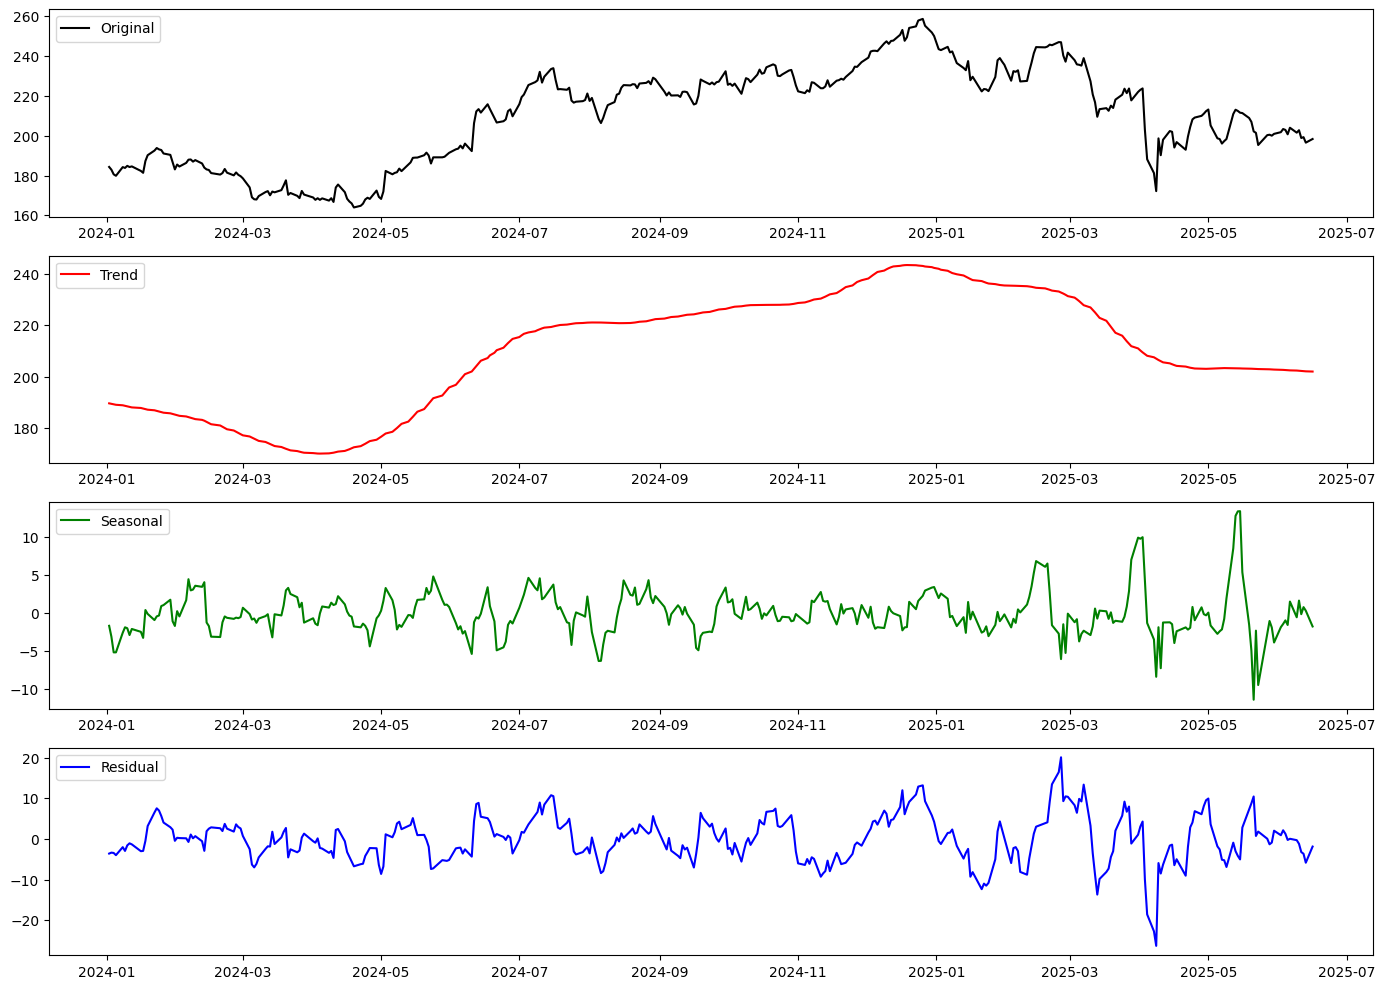

In [ ]:
from statsmodels.tsa.seasonal import STL

stl_decomposition=STL(stock_data['Close'],period=30)
stl_result=stl_decomposition.fit()

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'],label='Original',color='black')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(stl_result.trend,label='Trend',color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(stl_result.seasonal,label='Seasonal',color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(stl_result.resid,label='Residual',color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**STATIONARY TEST**

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(stock_data['Close'])
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print('Critical Values:')
for key,value in adf_test[4].items():
  print(f'{key}: {round(value,3)}')

ADF Statistic: -1.785
p-value: 0.388
Critical Values:
1%: -3.449
5%: -2.87
10%: -2.571


In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test=kpss(stock_data['Close'], regression='ct')

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key,value in kpss_test[3].items():
  print(f'{key}: {value}')

KPSS Test Results:
KPSS Statistic: 0.55
p-value: 0.01
Critical Values:
10%: 0.119
5%: 0.146
2.5%: 0.176
1%: 0.216


**MAKING THE DATA STATIONARY**

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(timeseries):
  timeseries = np.ravel(timeseries)
  adf_test=adfuller(timeseries)
  print('ADF Statistic:', adf_test[0])
  print('p-value:', adf_test[1])
  print('Critical Values:')
  for key,value in adf_test[4].items():
    print(f'{key}: {value}')

def kpss_test(timeseries):
  kpss_test=kpss(timeseries, regression='ct')
  print(f'KPSS Statistic: {kpss_test[0]}')
  print(f'p-value: {kpss_test[1]}')
  print('Critical Values:')
  for key,value in kpss_test[3].items():
    print(f'{key}: {value}')

In [ ]:
prices=stock_data['Close']

In [ ]:
adf_test(prices)

ADF Statistic: -1.7847263620907328
p-value: 0.38807056119362937
Critical Values:
1%: -3.4485948978753314
5%: -2.86957971128312
10%: -2.571053050314224


DEFRENCING

In [ ]:
prices

Ticker,AAPL
Date,
2024-01-02,184.290421
2024-01-03,182.910522
2024-01-04,180.587540
2024-01-05,179.862839
2024-01-08,184.210999
...,...
2025-06-10,202.669998
2025-06-11,198.779999
2025-06-12,199.199997


In [ ]:
prices_diff=prices.diff()

TRANSFORMATION

In [ ]:
import numpy as np
from scipy import stats


prices = stock_data['Close']


log_prices = np.log(prices)


sqrt_prices = np.sqrt(prices)


valid_prices = prices[prices > 0].dropna().values.ravel()


boxcox_transformed, lambda_value = stats.boxcox(valid_prices)



In [ ]:
adf_test(boxcox_transformed)

ADF Statistic: -1.793170979122499
p-value: 0.3838573450358788
Critical Values:
1%: -3.4485948978753314
5%: -2.86957971128312
10%: -2.571053050314224


In [ ]:
adf_test(prices_diff.dropna())

ADF Statistic: -11.249142683326102
p-value: 1.7294444155579005e-20
Critical Values:
1%: -3.4485948978753314
5%: -2.86957971128312
10%: -2.571053050314224


In [ ]:
4.057385039324022e-20<0.05

True

***Implementing models***

In [ ]:
stock_data=yf.download('AAPL',start='2024-01-01')

apple_price_stationary=stock_data['Close'].diff().dropna()

train_data, test_data=apple_price_stationary[:-30],apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


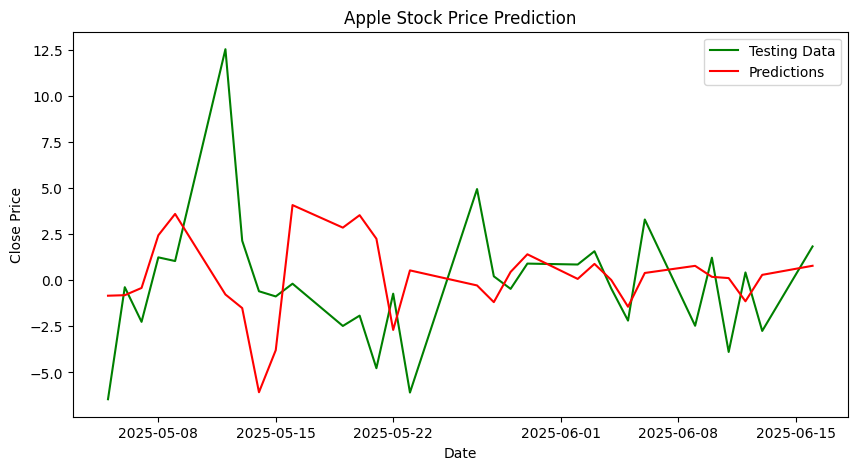

Root Mean Squared Error: 4.19


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model=ARIMA(train_data,order=(0,0,30))
model_fit=model.fit()

predictions=model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)


plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data,label='Testing Data',color='green')
plt.plot(test_data.index,predictions,label='Predictions',color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rsme = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print(f'Root Mean Squared Error: {rsme}')

**ARMA MODEL**

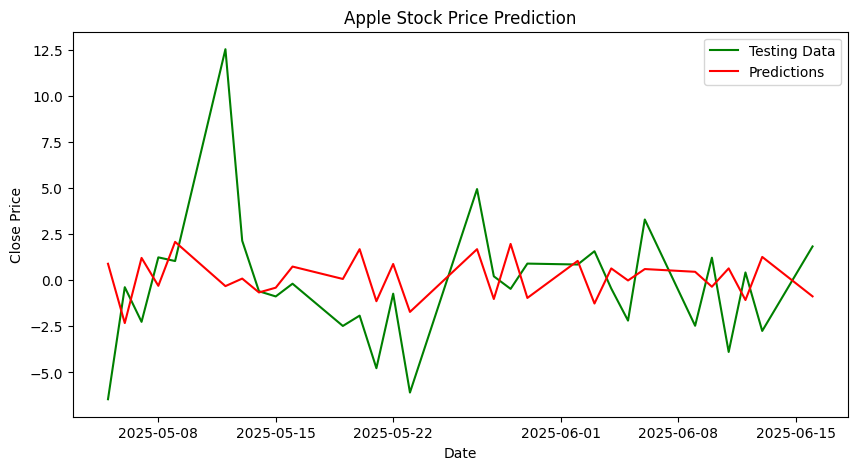

Root Mean Squared Error: 3.64


In [ ]:
model=ARIMA( train_data,order=(7,0,7))
model_fit=model.fit()

predictions=model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)


plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data,label='Testing Data',color='green')
plt.plot(test_data.index,predictions,label='Predictions',color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rsme = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print(f'Root Mean Squared Error: {rsme}')

**ARIMA MODEL**

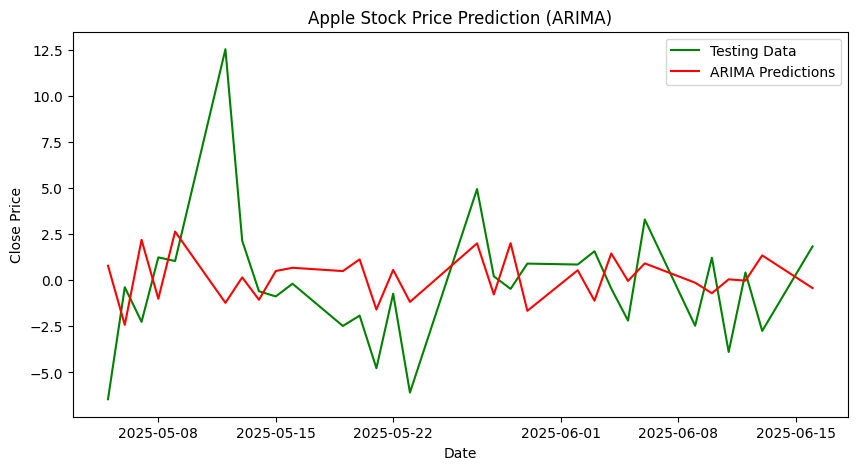

📊 Accuracy Metrics for ARIMA:
✅ RMSE: 3.76
✅ MAE:  2.83
✅ MAPE: 184.88%
✅ R² Score: -0.181


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


model = ARIMA(train_data, order=(7, 1, 7))
model_fit = model.fit()


forecast_arima = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Testing Data', color='green')
plt.plot(test_data.index, forecast_arima, label='ARIMA Predictions', color='red')
plt.title('Apple Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


actual = test_data.values
pred = forecast_arima.values

rmse = round(np.sqrt(mean_squared_error(actual, pred)), 2)
mae = round(mean_absolute_error(actual, pred), 2)
mape = round(mean_absolute_percentage_error(actual, pred) * 100, 2)
r2 = round(r2_score(actual, pred), 4)


print(f"📊 Accuracy Metrics for ARIMA:")
print(f"✅ RMSE: {rmse}")
print(f"✅ MAE:  {mae}")
print(f"✅ MAPE: {mape}%")
print(f"✅ R² Score: {r2}")


arima_metrics = pd.DataFrame({
    'Model': ['ARIMA'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE (%)': [mape],
    'R2 Score': [r2]
})

arima_metrics.to_csv("metrics_arima.csv", index=False)


**SARIMA MODEL**

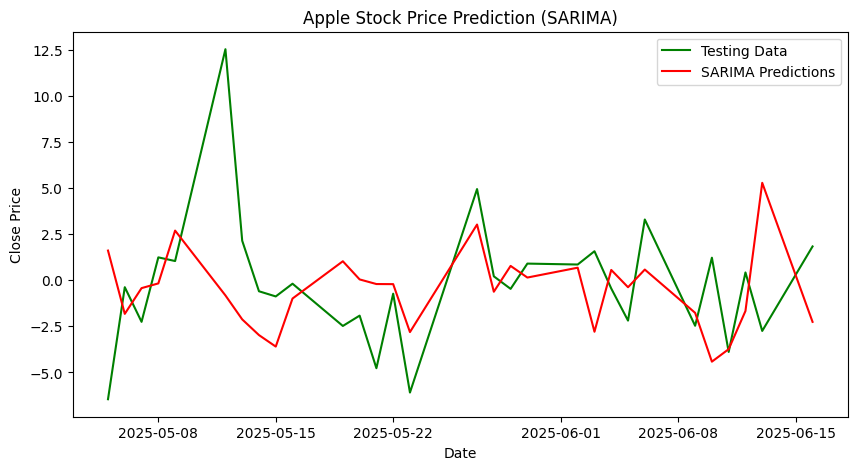

📊 Accuracy Metrics for SARIMA:
✅ RMSE: 4.03
✅ MAE:  2.91
✅ MAPE: 191.21%
✅ R² Score: -0.3596


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


p, d, q = 7, 1, 7
P, D, Q, s = 1, 1, 1, 45
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()


forecast_sarima = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Testing Data', color='green')
plt.plot(test_data.index, forecast_sarima, label='SARIMA Predictions', color='red')
plt.title('Apple Stock Price Prediction (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


actual = test_data.values
pred = forecast_sarima.values

rmse = round(np.sqrt(mean_squared_error(actual, pred)), 2)
mae = round(mean_absolute_error(actual, pred), 2)
mape = round(mean_absolute_percentage_error(actual, pred) * 100, 2)
r2 = round(r2_score(actual, pred), 4)


print(f"📊 Accuracy Metrics for SARIMA:")
print(f"✅ RMSE: {rmse}")
print(f"✅ MAE:  {mae}")
print(f"✅ MAPE: {mape}%")
print(f"✅ R² Score: {r2}")

import pandas as pd


sarima_metrics = pd.DataFrame({
    'Model': ['SARIMA'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE (%)': [mape],
    'R2 Score': [r2]
})

sarima_metrics.to_csv("metrics_sarima.csv", index=False)


**PROPHET MODEL**

DEBUG:cmdstanpy:input tempfile: /tmp/tmprsgqwfbx/6acp3ggf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsgqwfbx/o1wzxlhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85865', 'data', 'file=/tmp/tmprsgqwfbx/6acp3ggf.json', 'init=/tmp/tmprsgqwfbx/o1wzxlhv.json', 'output', 'file=/tmp/tmprsgqwfbx/prophet_modeljq5hn5mg/prophet_model-20250616145721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


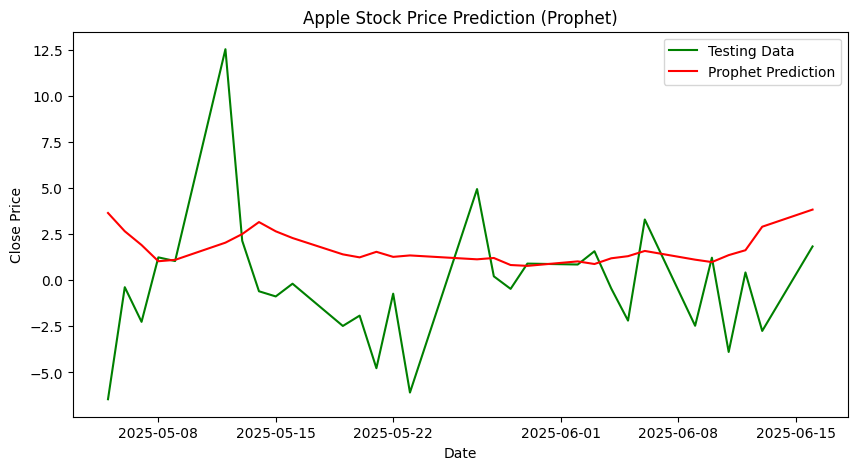

📊 Accuracy Metrics for Prophet:
✅ RMSE: 4.12
✅ MAE:  3.09
✅ MAPE: 227.37%
✅ R² Score: -0.4167


In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


df_train = train_data.reset_index()
df_train.columns = ['ds', 'y']


df_train['y'] = np.log1p(df_train['y'])


model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.15,
    seasonality_mode='additive'
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df_train)


future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)


forecast_prophet = forecast[['ds', 'yhat']].tail(len(test_data)).copy()
forecast_prophet['yhat'] = np.expm1(forecast_prophet['yhat'])
pred = forecast_prophet['yhat'].values
actual = test_data.values


plt.figure(figsize=(10, 5))
plt.plot(test_data.index, actual, label='Testing Data', color='green')
plt.plot(test_data.index, pred, label='Prophet Prediction', color='red')
plt.title('Apple Stock Price Prediction (Prophet)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


rmse = round(np.sqrt(mean_squared_error(actual, pred)), 2)
mae = round(mean_absolute_error(actual, pred), 2)
mape = round(mean_absolute_percentage_error(actual, pred) * 100, 2)
r2 = round(r2_score(actual, pred), 4)

print(f"📊 Accuracy Metrics for Prophet:")
print(f"✅ RMSE: {rmse}")
print(f"✅ MAE:  {mae}")
print(f"✅ MAPE: {mape}%")
print(f"✅ R² Score: {r2}")


prophet_metrics = pd.DataFrame({
    'Model': ['Prophet'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE (%)': [mape],
    'R2 Score': [r2]
})

prophet_metrics.to_csv("metrics_prophet.csv", index=False)


**LSTM**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


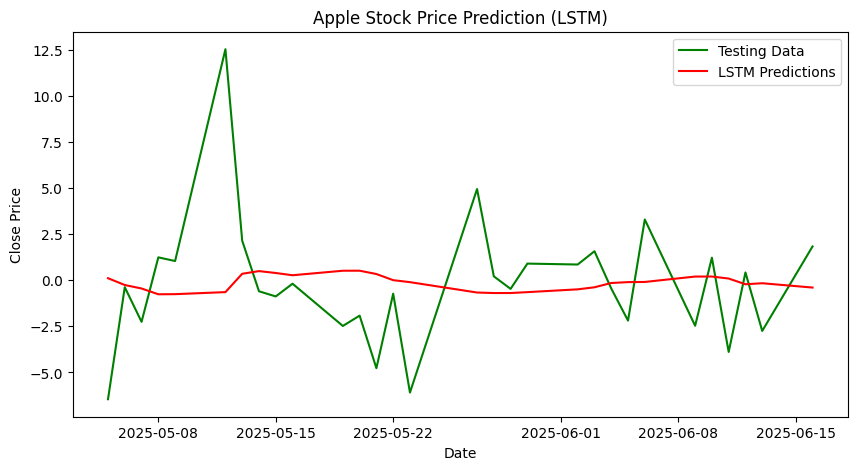

📊 Accuracy Metrics for LSTM:
✅ RMSE: 3.66
✅ MAE:  2.59
✅ MAPE: 127.7%
✅ R² Score: -0.1219


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))


def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 10
X_train, y_train = create_dataset(train_scaled, look_back)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=0)


full_data = np.concatenate((train_scaled[-look_back:], test_scaled))
X_test, y_test = create_dataset(full_data, look_back)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
actual = test_data.values[:len(predictions)]


plt.figure(figsize=(10, 5))
plt.plot(test_data.index[:len(predictions)], actual, label='Testing Data', color='green')
plt.plot(test_data.index[:len(predictions)], predictions, label='LSTM Predictions', color='red')
plt.title('Apple Stock Price Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


rmse = round(np.sqrt(mean_squared_error(actual, predictions)), 2)
mae = round(mean_absolute_error(actual, predictions), 2)
mape = round(mean_absolute_percentage_error(actual, predictions) * 100, 2)
r2 = round(r2_score(actual, predictions), 4)

print(f"📊 Accuracy Metrics for LSTM:")
print(f"✅ RMSE: {rmse}")
print(f"✅ MAE:  {mae}")
print(f"✅ MAPE: {mape}%")
print(f"✅ R² Score: {r2}")


lstm_metrics = pd.DataFrame({
    'Model': ['LSTM'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE (%)': [mape],
    'R2 Score': [r2]
})

lstm_metrics.to_csv("metrics_lstm.csv", index=False)


**SAVING THE MODEL**

In [ ]:
forecast_arima.to_csv("forecast_arima.csv", index=False)
forecast_sarima.to_csv("forecast_sarima.csv", index=False)
forecast_prophet.to_csv("forecast_prophet.csv", index=False)


lstm_forecast_df = pd.DataFrame({
    'Date': test_data.index[:len(predictions)],
    'LSTM_Predicted': predictions
})
lstm_forecast_df.to_csv("lstm_forecast.csv", index=False)


In [ ]:
from google.colab import files

# Download Forecast CSVs
files.download("forecast_arima.csv")
files.download("forecast_sarima.csv")
files.download("forecast_prophet.csv")
files.download("lstm_forecast.csv")

# Download Accuracy Metrics CSVs
files.download("metrics_arima.csv")
files.download("metrics_sarima.csv")
files.download("metrics_prophet.csv")
files.download("metrics_lstm.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define path in your Google Drive
drive_path = '/content/drive/MyDrive/Zidio/DA_measures'

# Create the folder if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Move forecast files to Drive
!cp forecast_arima.csv "{drive_path}"
!cp forecast_sarima.csv "{drive_path}"
!cp forecast_prophet.csv "{drive_path}"
!cp lstm_forecast.csv "{drive_path}"

# Move metrics files to Drive
!cp metrics_arima.csv "{drive_path}"
!cp metrics_sarima.csv "{drive_path}"
!cp metrics_prophet.csv "{drive_path}"
!cp metrics_lstm.csv "{drive_path}"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
